In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cpe232-dataset/sample_submission.csv
/kaggle/input/cpe232-dataset/train.csv
/kaggle/input/cpe232-dataset/test.csv


In [51]:
df = pd.read_csv("/kaggle/input/cpe232-dataset/train.csv")

test_df = pd.read_csv("/kaggle/input/cpe232-dataset/test.csv")

In [52]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,26.0,34427.0,RENT,5.946998,DEBTCONSOLIDATION,E,19270.0,11.272717,0.193133,Y,4.0,1
1,1,32.0,91102.0,MORTGAGE,8.527473,VENTURE,B,19815.0,12.831859,0.183127,N,4.0,0
2,2,25.0,25847.0,RENT,4.919103,PERSONAL,D,10043.0,15.532120,0.241554,Y,3.0,0
3,3,22.0,32863.0,RENT,3.427904,EDUCATION,NaN,12256.0,9.877151,0.198320,N,4.0,0
4,4,24.0,50740.0,RENT,2.842202,EDUCATION,C,6412.0,13.465822,0.185754,Y,2.0,1


In [53]:
df.shape

(39550, 13)

In [54]:
df.isnull().sum()

id                               0
person_age                    1085
person_income                 1058
person_home_ownership         1091
person_emp_length             1043
loan_intent                   1049
loan_grade                    1093
loan_amnt                     1081
loan_int_rate                 1077
loan_percent_income           1090
cb_person_default_on_file     1065
cb_person_cred_hist_length    1086
loan_status                      0
dtype: int64

In [55]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,39550.00000,38465.000000,38492.00000,38507.000000,38469.000000,38473.000000,38460.000000,38464.000000,39550.000000
mean,19774.50000,27.972650,60092.69430,5.201428,9349.245782,11.777246,0.163219,5.724288,0.254185
std,11417.24591,6.273788,31180.30954,3.437699,5696.712524,3.674727,0.100170,3.969586,0.435407
min,0.00000,21.000000,11664.00000,0.000046,118.000000,4.917300,0.000473,2.000000,0.000000
25%,9887.25000,24.000000,37699.75000,3.048524,5053.000000,8.092832,0.088853,3.000000,0.000000
50%,19774.50000,26.000000,52550.00000,4.964736,7681.000000,11.434505,0.133511,4.000000,0.000000
75%,29661.75000,30.000000,72169.50000,6.496326,12200.000000,14.090959,0.207444,7.000000,1.000000
max,39549.00000,66.000000,249272.00000,25.100039,36213.000000,22.969506,0.552968,31.000000,1.000000


## Replace the NaN values with the mean and the most occurances

In [56]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Fill missing values for numerical columns with the mean
df[numerical_columns.columns] = numerical_columns.fillna(numerical_columns.mean())

# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_columns.columns:
    df[col] = categorical_columns[col].fillna(categorical_columns[col].mode()[0])

print("DataFrame after handling missing values:")
print(df)

DataFrame after handling missing values:
          id  person_age  person_income person_home_ownership  \
0          0        26.0     34427.0000                  RENT   
1          1        32.0     91102.0000              MORTGAGE   
2          2        25.0     25847.0000                  RENT   
3          3        22.0     32863.0000                  RENT   
4          4        24.0     50740.0000                  RENT   
...      ...         ...            ...                   ...   
39545  39545        30.0    197453.0000              MORTGAGE   
39546  39546        21.0     77450.0000              MORTGAGE   
39547  39547        29.0     47254.0000                  RENT   
39548  39548        23.0     24691.0000                  RENT   
39549  39549        23.0     60092.6943                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
0               5.946998  DEBTCONSOLIDATION          E    19270.0   
1               8.527473            VENT

Also with the test.csv

In [57]:
# Separate numerical and categorical columns
numerical_columns = test_df.select_dtypes(include=['number'])
categorical_columns = test_df.select_dtypes(include=['object', 'category'])

# Fill missing values for numerical columns with the mean
test_df[numerical_columns.columns] = numerical_columns.fillna(numerical_columns.mean())

# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_columns.columns:
    test_df[col] = categorical_columns[col].fillna(categorical_columns[col].mode()[0])

print("DataFrame after handling missing values:")
print(test_df)

DataFrame after handling missing values:
          id  person_age  person_income person_home_ownership  \
0      39550        22.0   30330.000000                  RENT   
1      39551        31.0   79403.000000              MORTGAGE   
2      39552        25.0   26966.000000                  RENT   
3      39553        25.0   60425.057994              MORTGAGE   
4      39554        27.0   87388.000000              MORTGAGE   
...      ...         ...            ...                   ...   
16945  56495        23.0   49100.000000                  RENT   
16946  56496        30.0   66618.000000              MORTGAGE   
16947  56497        32.0   34982.000000                  RENT   
16948  56498        22.0   50063.000000                 OTHER   
16949  56499        31.0   76258.000000              MORTGAGE   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
0               6.221275            MEDICAL          C    19989.0   
1               9.876324            VENT

In [58]:
test_df.shape

(16950, 12)

## Data Preprocessing

In [59]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_columns.columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    test_df[col] = label_encoders[col].fit_transform(test_df[col])

print("Encoded DataFrame: !")

Encoded DataFrame: !
Encoded DataFrame: !


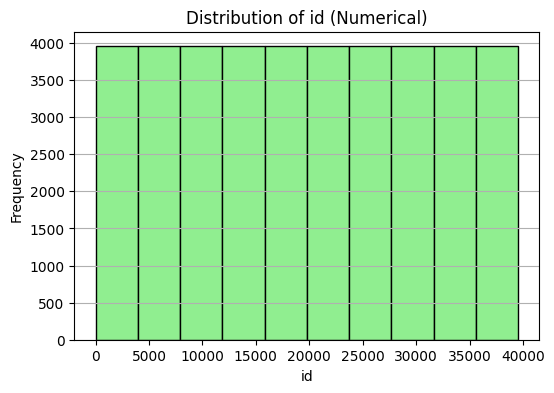

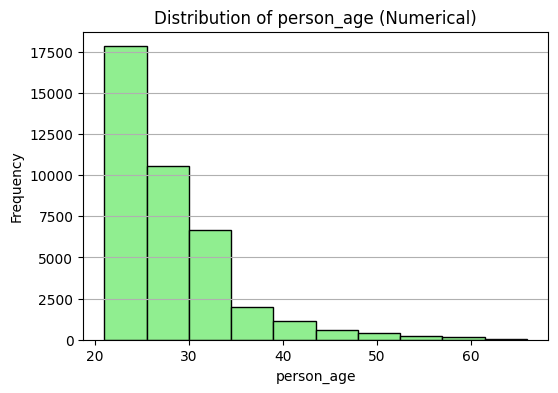

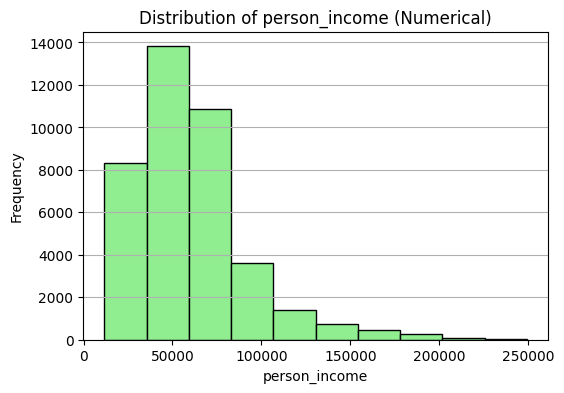

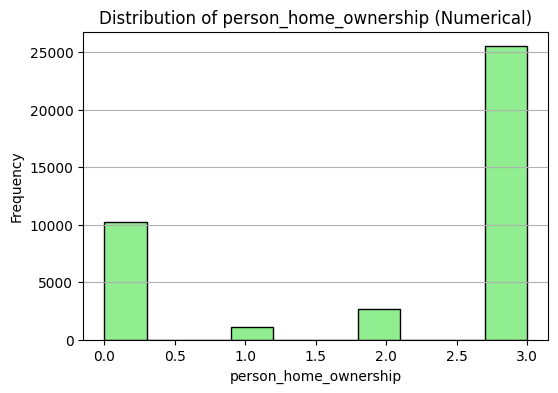

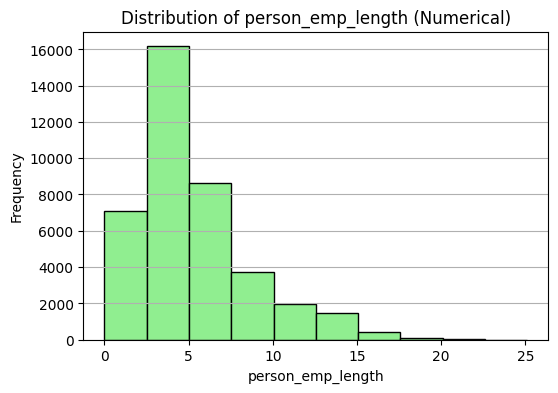

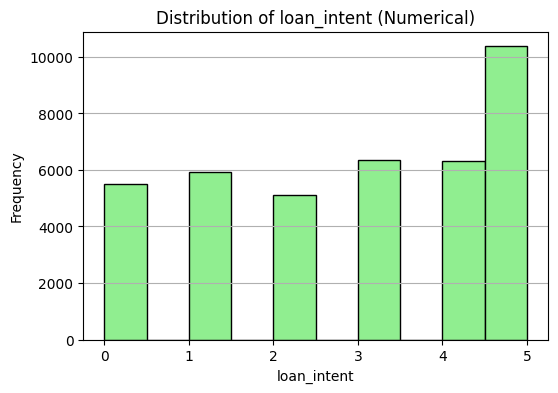

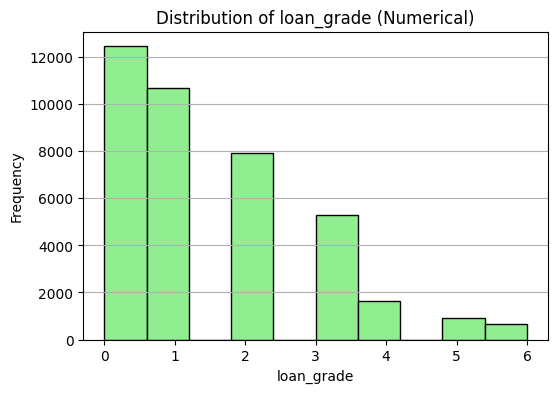

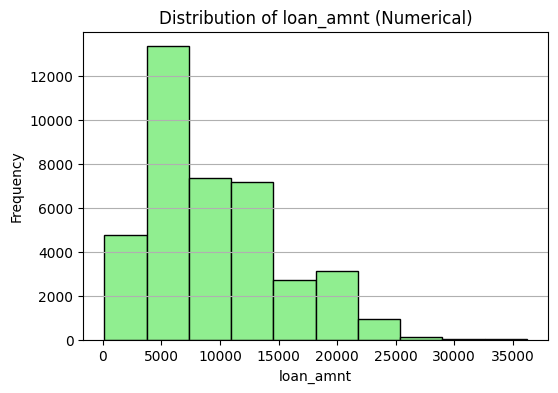

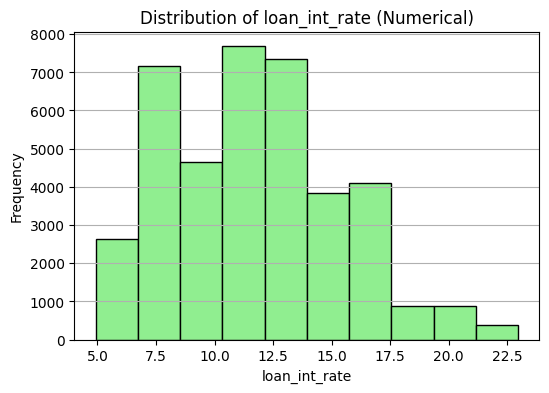

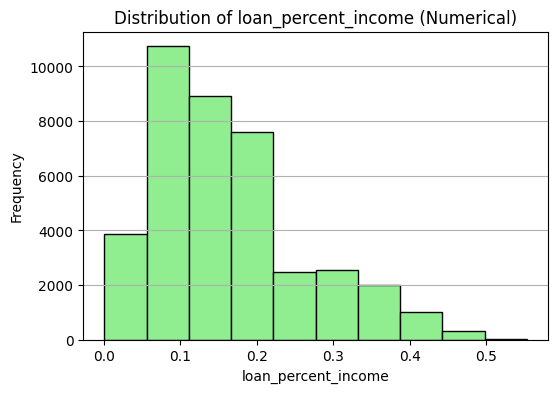

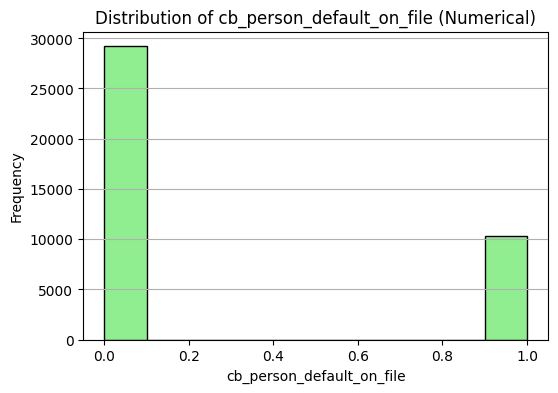

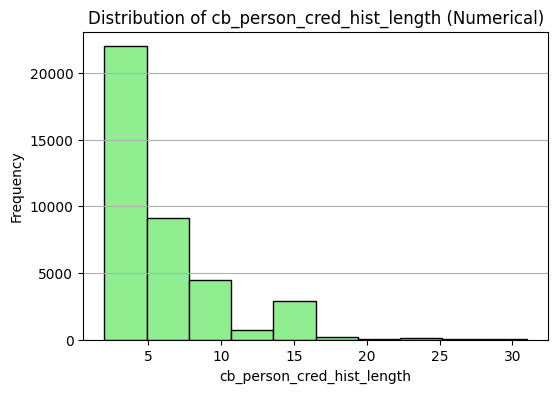

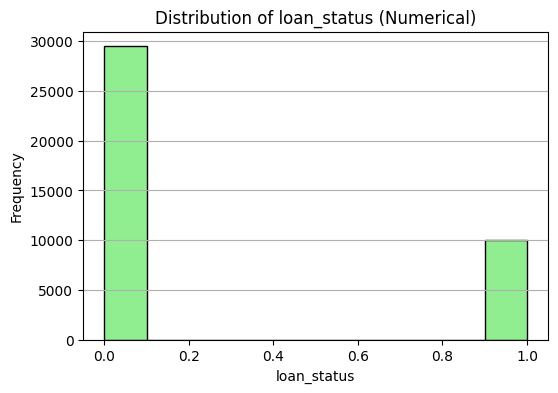

In [61]:
import matplotlib.pyplot as plt

# Plot histograms for all columns
for column in df.columns:
    plt.figure(figsize=(6, 4))
    if df[column].dtype == 'object':  # Categorical column
        df[column].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {column} (Categorical)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:  # Numerical column
        df[column].plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
        plt.title(f'Distribution of {column} (Numerical)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `df` is your DataFrame
select_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the selected features
df[select_features] = scaler.fit_transform(df[select_features])
test_df[select_features] = scaler.fit_transform(test_df[select_features])

See the correlations and the featurewiz to doing the feature engineering

In [64]:
!pip install featurewiz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 8.5 MB/s eta 0:00:000:00:0100:01
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2435 sha256=1e7185400381b4202e2519bfe57656ab4074616f212febca82167bb028293fb0
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: category_encoders
    Found existing installation: category_encoders 2.7.0
    Uninstalling category_encoders-2.7.0:
      Successfully uninstall

In [65]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,-0.318835,-0.834385,3,0.219801,0,4,1.765809,-0.139207,0.193133,1,-0.44047,1
1,1,0.650932,1.008104,0,0.980549,5,1,1.862815,0.290984,0.183127,0,-0.44047,0
2,2,-0.480463,-1.113318,3,-0.083232,4,3,0.123482,1.036027,0.241554,1,-0.69592,0
3,3,-0.965347,-0.885230,3,-0.522851,1,0,0.517377,-0.524265,0.198320,0,-0.44047,0
4,4,-0.642091,-0.304053,3,-0.695522,1,2,-0.522805,0.465904,0.185754,1,-0.95137,1


In [71]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [66]:
from featurewiz import featurewiz

target = 'loan_status'

feats = featurewiz(df, target, corr_limit=0.7, verbose=0)
len(feats)

Imported lazytransform v1.18. 

Imported featurewiz 0.6.1. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True,
        		category_encoders="auto", auto_encoders='VAE', ae_options={},
        		add_missing=False, imbalanced=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Binary_Classification problem 
    Loaded train data. Shape = (39550, 13)
    Single_Label Binary_Classification problem 
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
    Single_Label Binary_Classification problem 
    loading a ra

2

In [72]:
wiz_features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length']

In [68]:
!pip install catboost

In [75]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

# Define your features and target
# features = ['loan_percent_income', 'loan_int_rate', 'cb_person_cred_hist_length']
features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length']
target = 'loan_status'  # Replace with the actual name of your target column

# Splitting the data into training and test sets (if needed)
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost classifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.02, depth=6, verbose=0)  # Adjust parameters as needed

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

# Feature importance (optional)
feature_importances = model.get_feature_importance()
for feature, importance in zip(features, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

0:	learn: 0.6770560	total: 6.42ms	remaining: 6.41s
1:	learn: 0.6607936	total: 13ms	remaining: 6.5s
2:	learn: 0.6463112	total: 19.4ms	remaining: 6.45s
3:	learn: 0.6326186	total: 25.5ms	remaining: 6.35s
4:	learn: 0.6192074	total: 31.5ms	remaining: 6.27s
5:	learn: 0.6065948	total: 37.3ms	remaining: 6.17s
6:	learn: 0.5951330	total: 43.2ms	remaining: 6.13s
7:	learn: 0.5842835	total: 49.6ms	remaining: 6.15s
8:	learn: 0.5733954	total: 55.5ms	remaining: 6.11s
9:	learn: 0.5643459	total: 61.5ms	remaining: 6.08s
10:	learn: 0.5549225	total: 67.7ms	remaining: 6.08s
11:	learn: 0.5460573	total: 74.5ms	remaining: 6.13s
12:	learn: 0.5376414	total: 80.5ms	remaining: 6.11s
13:	learn: 0.5295923	total: 86.7ms	remaining: 6.11s
14:	learn: 0.5227933	total: 92.8ms	remaining: 6.09s
15:	learn: 0.5157512	total: 98.2ms	remaining: 6.04s
16:	learn: 0.5084256	total: 104ms	remaining: 6.04s
17:	learn: 0.5017344	total: 111ms	remaining: 6.04s
18:	learn: 0.4957017	total: 117ms	remaining: 6.03s
19:	learn: 0.4895899	total: 

In [76]:
# Predict on the test dataset
test_predictions = model.predict(test_df[features])

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],  # Ensure your test_df has an 'Id' column
    'loan_status': test_predictions
})

# Save to CSV
submission.to_csv('submission_2.csv', index=False)

print("Submission file saved as submission.csv")

Submission file saved as submission.csv
